# **Chance of Admission Prediction Using Linear Regression**

**Import Library**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Import Data**

In [4]:
admission = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Admission%20Chance.csv')


**Explore Data**

In [5]:
admission.head()

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
admission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No          400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4    SOP               400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [7]:
admission.describe()

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [8]:
admission.dtypes

Serial No              int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
 SOP                 float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

**Identifying Missing Values**

In [9]:
admission.isnull()

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
395,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False
397,False,False,False,False,False,False,False,False,False
398,False,False,False,False,False,False,False,False,False


In [10]:
admission.isnull().sum()

Serial No            0
GRE Score            0
TOEFL Score          0
University Rating    0
 SOP                 0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

**Data Preprocessing**

In [11]:
# Outlier Visualization

<Axes: >

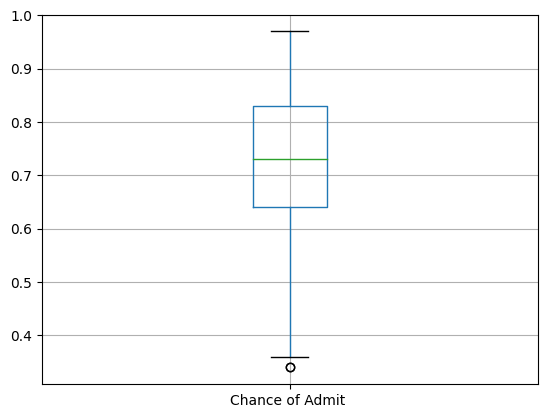

In [12]:
admission.boxplot(column=['Chance of Admit '])

<Axes: >

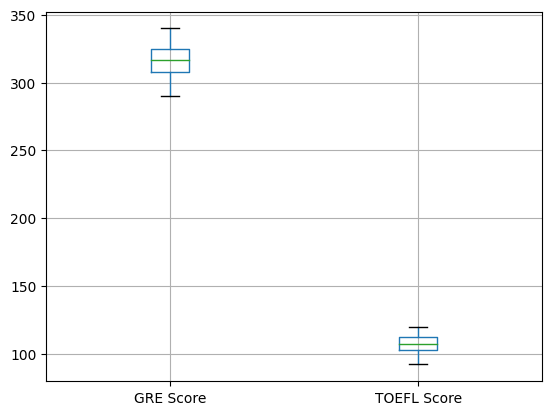

In [13]:
admission.boxplot(column=['GRE Score','TOEFL Score'])

<Axes: >

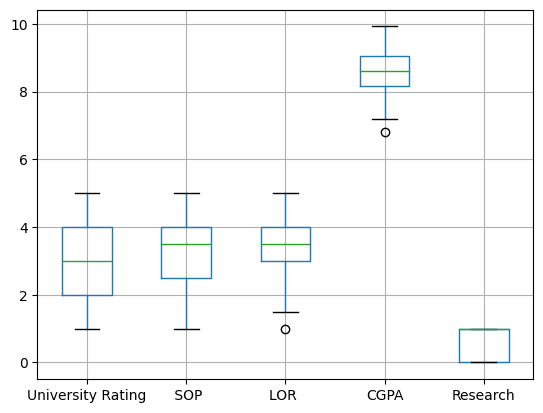

In [14]:
admission.boxplot(column=['University Rating', ' SOP','LOR ', 'CGPA', 'Research',])

In [15]:
# Dropping Serial No. as it is not requried for prediction
adm1 = admission.copy()
adm1.drop(['Serial No'],axis=1, inplace=True)

In [16]:
# Calculating quantiles for each feature
Q1 = adm1.quantile(0.25)
Q3 = adm1.quantile(0.75)
IQR = Q3 - Q1
IQR

GRE Score            17.0000
TOEFL Score           9.0000
University Rating     2.0000
 SOP                  1.5000
LOR                   1.0000
CGPA                  0.8925
Research              1.0000
Chance of Admit       0.1900
dtype: float64

**Identifying and Removing Outlier**

In [17]:
out1 = adm1[((adm1 < (Q1 - 1.5 * IQR)) | (adm1 > (Q3 + 1.5 * IQR))).any(axis=1)]
out1.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
58,300,99,1,3.0,2.0,6.80,1,0.36
92,298,98,2,4.0,3.0,8.03,0,0.34
347,299,94,1,1.0,1.0,7.34,0,0.42
376,297,96,2,2.5,2.0,7.43,0,0.34


In [18]:
out = adm1[~((adm1 < (Q1 - 1.5 * IQR)) | (adm1 > (Q3 + 1.5 * IQR))).any(axis=1)]
admission = out.copy()
admission.shape

(396, 8)

**Data Visualization**

Text(0.5, 0, 'Chances')

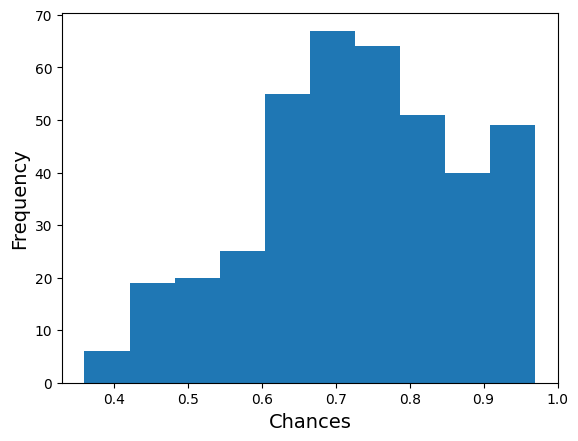

In [19]:
admission['Chance of Admit '].plot.hist()
plt.ylabel('Frequency',fontsize=14)
plt.xlabel('Chances',fontsize=14)

Text(0.5, 0, 'University Rating')

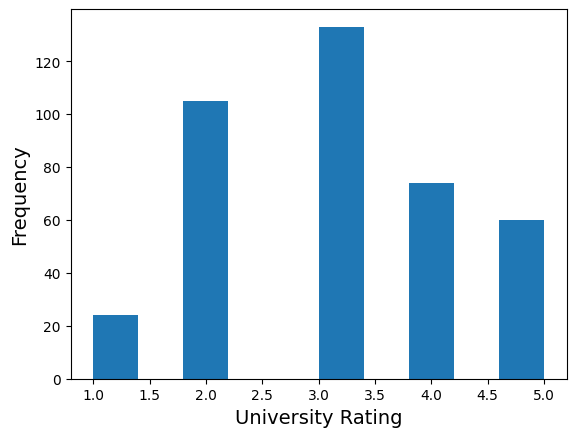

In [20]:
admission['University Rating'].plot.hist()
plt.ylabel('Frequency',fontsize=14)
plt.xlabel('University Rating',fontsize=14)

In [21]:
admission['Research'].value_counts()

Research
1    218
0    178
Name: count, dtype: int64

<Axes: xlabel='GRE Score', ylabel='Chance of Admit '>

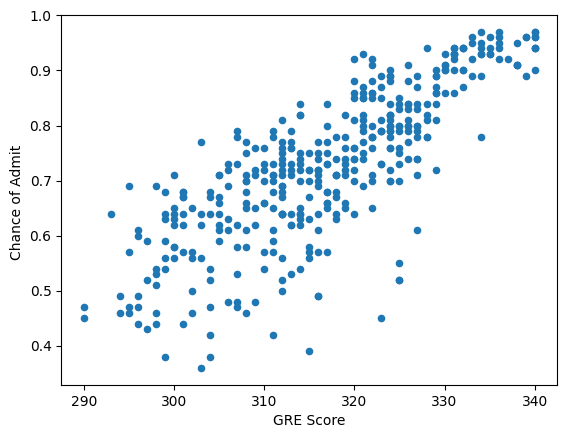

In [22]:
admission.plot.scatter(x='GRE Score',y='Chance of Admit ')

In [23]:
admission['GRE Score'].corr(admission['Chance of Admit '])

0.7981446024321517

<Axes: xlabel='TOEFL Score', ylabel='Chance of Admit '>

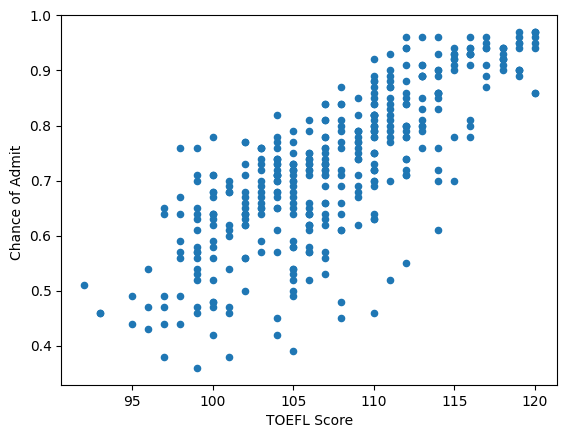

In [24]:
admission.plot.scatter(x='TOEFL Score',y='Chance of Admit ')

In [25]:
admission['TOEFL Score'].corr(admission['Chance of Admit '])

0.7855190145501377

<Axes: xlabel='CGPA', ylabel='Chance of Admit '>

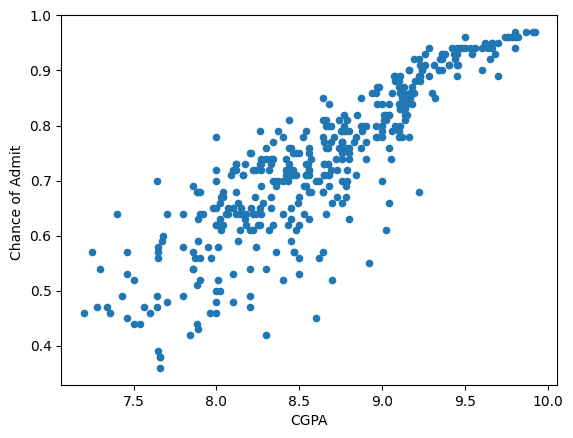

In [26]:
admission.plot.scatter(x='CGPA',y='Chance of Admit ')

In [27]:
admission['CGPA'].corr(admission['Chance of Admit '])

0.8709125643678217

<Axes: xlabel='CGPA', ylabel='TOEFL Score'>

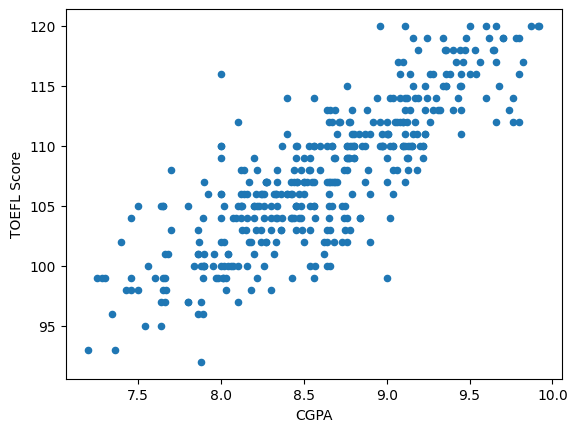

In [28]:
admission.plot.scatter(x='CGPA',y='TOEFL Score')

In [29]:
admission['CGPA'].corr(admission['TOEFL Score'])

0.8253845537475006

In [30]:
admission['CGPA'].corr(admission['GRE Score'])

0.8310846092236094

**Define Target Variable (y) and Feature Variables (X)**

In [31]:
admission.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', ' SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [32]:
Y = admission['Chance of Admit ']

In [33]:
X = admission.drop(['Chance of Admit '],axis=1)

**Train Test Split**

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.7,random_state=2529)

In [35]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((277, 7), (119, 7), (277,), (119,))

**Modeling**

In [36]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [37]:
model.fit(X_train,Y_train)

LinearRegression()

In [38]:
model.intercept_

-1.3253251158336978

In [39]:
model.coef_

array([ 0.00203575,  0.00351641,  0.0068202 , -0.00015199,  0.01874285,
        0.10887611,  0.0144351 ])

**Prediction**

In [40]:
Y_pred = model.predict(X_test)

In [41]:
Y_pred

array([0.46284406, 0.57926743, 0.90916123, 0.75132879, 0.94052984,
       0.68761034, 0.76164595, 0.72019121, 0.8111689 , 0.77635511,
       0.8441396 , 0.69468291, 0.64655021, 0.57126315, 0.67544107,
       0.65357964, 0.88020953, 0.51814117, 0.79365396, 0.78002845,
       0.73729648, 0.96795841, 0.95168689, 0.93580946, 0.65834248,
       0.65178386, 0.51679756, 0.55378334, 0.9079036 , 0.69085975,
       0.65472584, 0.73190828, 0.65924734, 0.64446274, 0.72133204,
       0.43015599, 0.7819034 , 0.64415848, 0.73413538, 0.72328671,
       0.65084596, 0.93740732, 0.74422908, 0.50448831, 0.80444927,
       0.95097301, 0.88592359, 0.73369181, 0.8531569 , 0.75363802,
       0.64951782, 0.68497616, 0.7545892 , 0.88320247, 0.5156062 ,
       0.63939688, 0.85606933, 0.70325935, 0.71036631, 0.90030936,
       0.73878613, 0.67874738, 0.67864855, 0.83051035, 0.7896459 ,
       0.87191162, 0.94773227, 0.59639963, 0.6944703 , 0.58967602,
       0.61551046, 0.44561641, 0.73933116, 0.57796922, 0.93228

In [42]:
Y_pred.shape

(119,)

**Model Evaluation**

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [44]:
train_pred = model.predict(X_train)
MAE = mean_absolute_error(Y_train,train_pred)
print('Test Mean Absolute Error for train data: ', MAE)

Test Mean Absolute Error for train data:  0.04384969090854791


In [45]:
test_pred = model.predict(X_test)
MAE = mean_absolute_error(Y_test,test_pred)
print('Test Mean Absolute Error for test data: ', MAE)

Test Mean Absolute Error for test data:  0.04502294986722351
